In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re
import string

# Load the dataset

data = pd.read_csv('IMDB Dataset.csv')
print(data)

# Text pre-processing function
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    return text

# Apply pre-processing to the review column
data['review'] = data['review'].apply(preprocess_text)

# Encode the sentiment labels
label_encoder = LabelEncoder()
data['sentiment'] = label_encoder.fit_transform(data['sentiment'])
print(f"Predicted sentiment:data['sentiment']{[0]}")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)

# Check the first few rows of the pre-processed data
X_train.head(), y_train.head()


                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]
Predicted sentiment:data['sentiment'][0]


(39087    thats what i kept asking myself during the man...
 30893    i did not watch the entire movie i could not w...
 45278    a touching love story reminiscent of in the m...
 16398    this latterday fulci schlocker is a totally ab...
 13653    first of all i firmly believe that norwegian m...
 Name: review, dtype: object,
 39087    0
 30893    0
 45278    1
 16398    0
 13653    0
 Name: sentiment, dtype: int32)

In [1]:
import re
import nltk
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Activation,Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import  Embedding, LSTM

In [3]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()
print(df)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [4]:
df.isnull().sum()


review       0
sentiment    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


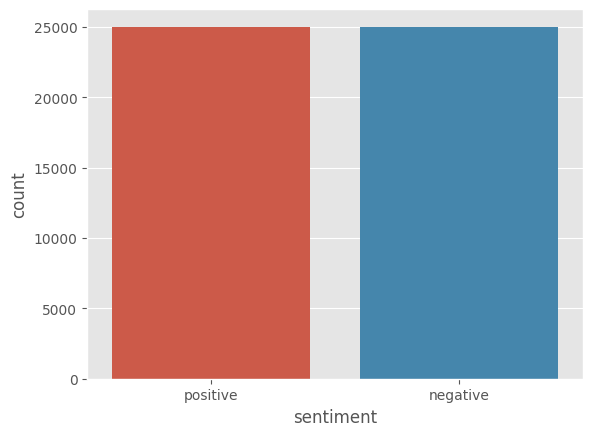

In [6]:
import seaborn as sns
plt.style.use("ggplot")
sns.countplot(data = df, x = df["sentiment"])
plt.show()

In [7]:
df["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [8]:
df["review"][2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [11]:
stopwords_list = set(stopwords.words('english'))


TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)
    

class CustomPreprocess():

    def __init__(self):
        pass

    def preprocess_text(self,sen):
        sen = sen.lower()
        
        # Remove html tags
        sentence = remove_tags(sen)

        # Remove punctuations and numbers
        sentence = re.sub('[^a-zA-Z]', ' ', sentence)
        
        # Single character removal
        sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

        # Remove multiple spaces
        sentence = re.sub(r'\s+', ' ', sentence)
        
        # Remove Stopwords
        pattern = re.compile(r'\b(' + r'|'.join(stopwords_list) + r')\b\s*')
        sentence = pattern.sub('', sentence)
        
        return sentence
custom = CustomPreprocess()
custom.preprocess_text("I thought this was a wonderful way to spend time on a too hot summer weekend")

'thought wonderful way spend time hot summer weekend'

In [12]:
x = []
sentences = list(df['review'])
for sen in sentences:
    x.append(custom.preprocess_text(sen))
y = df['sentiment']
sentiment_map = {'negative' : 0, 'positive': 1}
y = np.array(y.map(sentiment_map))
y[:15]

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [13]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from textblob import TextBlob

# Sample text
text = "I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer)."

# Sentiment analysis using TextBlob
blob = TextBlob(text)
sentiment = blob.sentiment

# Preparing data for text classification
# For demonstration, we'll use a small dataset
texts = [
    "I love this movie, it's fantastic!",
    "This is a terrible movie, I hated it.",
    "An excellent film with great performances.",
    "I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer).",
    "The movie was okay, not great but not terrible either.",
    "Worst movie ever, don't waste your time.",
    "A delightful comedy with a simple plot but charming characters.",
    "Not my cup of tea, I found it boring."
]

labels = [1, 0, 1, 1, 0, 0, 1, 0]  # 1: Positive, 0: Negative

# Vectorizing the text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)
y = labels

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predicting on the test set
y_pred = clf.predict(X_test)

# Calculating accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Output results
sentiment_analysis = f"Sentiment: Polarity={sentiment.polarity}, Subjectivity={sentiment.subjectivity}"
classification_metrics = f"Accuracy={accuracy}, Precision={precision}, Recall={recall}, F1 Score={f1}"

sentiment_analysis, classification_metrics

C:\Users\ibmuser\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


('Sentiment: Polarity=0.375, Subjectivity=0.8083333333333332',
 'Accuracy=0.6666666666666666, Precision=0.0, Recall=0.0, F1 Score=0.0')

In [ ]:
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from nltk.corpus import movie_reviews
import pandas as pd

# Download NLTK data
nltk.download('movie_reviews')
nltk.download('punkt')

# Load the movie reviews dataset
reviews = [(list(movie_reviews.words(fileid)), category)
           for category in movie_reviews.categories()
           for fileid in movie_reviews.fileids(category)]

# Convert to a DataFrame
reviews_df = pd.DataFrame(reviews, columns=['review', 'sentiment'])
reviews_df['review'] = reviews_df['review'].apply(lambda x: ' '.join(x))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(reviews_df['review'], reviews_df['sentiment'], test_size=0.3, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Make predictions
y_pred = model.predict(X_test_vec)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='pos')
recall = recall_score(y_test, y_pred, pos_label='pos')
f1 = f1_score(y_test, y_pred, pos_label='pos')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Sentiment analysis on the provided text
provided_text = "I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer)."
provided_text_vec = vectorizer.transform([provided_text])
predicted_sentiment = model.predict(provided_text_vec)[0]

print(f'Sentiment of provided text: {predicted_sentiment}')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\ibmuser\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ibmuser\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
